In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('E:\Project\MachienLearning\Titanic\Data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data_cleaned = df.copy()

In [7]:
data_cleaned = data_cleaned.drop(['PassengerId','Name','Ticket'],axis=1)

In [8]:
data_cleaned['Age'].fillna(data_cleaned['Age'].mean(),inplace=True)
data_cleaned['Cabin'].fillna('A24',inplace=True)

In [9]:
lableEncoder = LabelEncoder()
data_cleaned['Sex'] = lableEncoder.fit_transform(data_cleaned['Sex'])
data_cleaned['Embarked'] = lableEncoder.fit_transform(data_cleaned['Embarked'])
data_cleaned['Cabin'] = lableEncoder.fit_transform(data_cleaned['Cabin'])

In [10]:
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,147,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,147,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,147,2


In [11]:
X = data_cleaned.drop('Survived', axis=1).values
y = data_cleaned['Survived'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomForest

In [44]:
rf_clf = RandomForestClassifier(criterion='entropy',max_depth=9, n_estimators=250,max_features='log2', random_state=2023,verbose=1)
rf_clf.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred_RF = rf_clf.predict(X_test)
# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred_RF))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8022388059701493
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.82      0.67      0.74       111

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



In [25]:
forest = RandomForestClassifier()
#
# Create parameters for GridSearch & train the model
#
parameters = { 'n_estimators':[150, 200, 500],
                'max_features': [None, 'sqrt', 'log2'],
                'max_depth' : [8,9,10,11,12],
                'criterion':['entropy','gini','log_loss'],
                'bootstrap': [True, False],
                'class_weight':['balanced','balanced_subsample',None]
              }
rf = GridSearchCV(forest, parameters, cv=5, error_score='raise')
rf.fit(X_train, y_train)

print(rf.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=200)


# DecissonTree

In [87]:
dt_clf= DecisionTreeClassifier(criterion='entropy',random_state=6)
dt_clf.fit(X_train,y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred_DT = dt_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test,y_pred_DT))

Accuracy: 0.7388059701492538
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       157
           1       0.72      0.61      0.66       111

    accuracy                           0.74       268
   macro avg       0.73      0.72      0.72       268
weighted avg       0.74      0.74      0.73       268



In [80]:
feature_name = data_cleaned.drop('Survived', axis=1)
feature_imp = pd.Series(rf_clf.feature_importances_,index=feature_name.iloc[0].index).sort_values(ascending=False)
feature_imp

Sex         0.286609
Fare        0.204882
Age         0.186272
Cabin       0.103488
Pclass      0.093555
SibSp       0.051157
Parch       0.037614
Embarked    0.036423
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


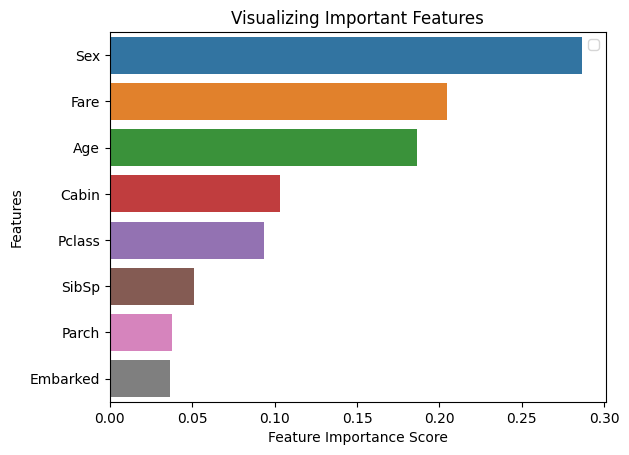

In [81]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [79]:
decision = DecisionTreeClassifier()
#
# Create parameters for GridSearch & train the model
#
parameters = {  'max_features': [None, 'sqrt', 'log2'],
                'max_depth' : [8,9,10,11,12],
                'criterion':['entropy','gini','log_loss'],
                'splitter':['best','random'],
                'random_state':[6,None],
                'class_weight':['balanced',None]
            }
dt = GridSearchCV(decision, parameters, cv=10, error_score='raise')
dt.fit(X_train, y_train)

print(dt.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=6,
                       splitter='random')


# XGBOOST

In [90]:
from xgboost import XGBClassifier

In [111]:
xgb_clf = XGBClassifier(eta= 0.08,objective="binary:logistic",random_state= 6)
xgb_clf.fit(X_train,y_train)

y_pred_XGB = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_XGB))

Accuracy: 0.8171641791044776


# Submission

In [28]:
df_test = pd.read_csv('E:\Project\MachienLearning\Titanic\Data/test.csv')
submission_id = df_test.PassengerId

In [29]:
df_test_cleaned = df_test.copy()

In [30]:
df_test_cleaned = df_test_cleaned.drop(['PassengerId','Name','Ticket'],axis=1)
df_test_cleaned['Age'].fillna(df_test_cleaned['Age'].mean(),inplace=True)
df_test_cleaned['Cabin'].fillna('V',inplace=True)
df_test_cleaned['Sex'] = lableEncoder.fit_transform(df_test_cleaned['Sex'])
df_test_cleaned['Embarked'] = lableEncoder.fit_transform(df_test_cleaned['Embarked'])
df_test_cleaned['Cabin'] = lableEncoder.fit_transform(df_test_cleaned['Cabin'])
df_test_cleaned['Fare'].fillna(df_test_cleaned['Fare'].mean(),inplace=True)

In [31]:
df_test_cleaned.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,76,1
1,3,0,47.0,1,0,7.0000,76,2
2,2,1,62.0,0,0,9.6875,76,1
3,3,1,27.0,0,0,8.6625,76,2
4,3,0,22.0,1,1,12.2875,76,2


In [21]:
df_test_cleaned.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

randomforest

In [112]:
predictions = rf_clf.predict(df_test_cleaned)

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


decisiontree

In [88]:
predictions = dt_clf.predict(df_test_cleaned)

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


XGBOOST

In [113]:
predictions = xgb_clf.predict(df_test_cleaned)

In [115]:
output = pd.DataFrame({'PassengerId': submission_id,
                       'Survived': predictions})

output.head()

sample_submission_df = pd.read_csv('E:\Project\MachienLearning\Titanic\Data\gender_submission.csv')
sample_submission_df['Survived'] = predictions
sample_submission_df.to_csv('E:\Project\MachienLearning\Titanic\Submission\submission_XGB.csv', index=False)
sample_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
